# Evaluation of the first experiment

In [62]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_result(path):
    with open(path, 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

def visual(paths):
    passive = load_result(paths[0])
    oneDCNN = load_result(paths[1])
    onlinePN = load_result(paths[2])
    offlinePN = load_result(paths[3])
    transferPN = load_result(paths[4])
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(oneDCNN["plot_indeces"], oneDCNN["accuracy"][0], label = oneDCNN["estimator"])
    ax.plot(onlinePN["plot_indeces"], onlinePN["accuracy"][0], label = onlinePN["estimator"])
    ax.plot(offlinePN["plot_indeces"], offlinePN["accuracy"][0], label = offlinePN["estimator"])
    #ax.plot(transfer["plot_indeces"], transfer["accuracy"][0], label = transfer["estimator"])
    ax.plot(transferPN["plot_indeces"], transferPN["accuracy"][0], label = transferPN["estimator"])
    ax.plot(passive["plot_indeces"], passive["accuracy"][0], label = "PassiveLearning", linestyle="--",alpha=0.3)
    ax.set_xlabel("query number")
    ax.set_ylabel("accuracy")
    ax.set_title("Algorithm Structure Investigation")
    ax.legend()  

In [40]:
paths_1 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/1_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/1_result/OnlinePrototypicalNetwork__uncertainty_sampling__1.pkl",
"exp_results/1_result/OfflinePrototypicalNetwork__uncertainty_sampling__1.pkl",
"exp_results/1_result/TransferPrototypicalNetwork__uncertainty_sampling__1.pkl"]
paths_2 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/2_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/2_result/OnlinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/2_result/OfflinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/2_result/TransferPrototypicalNetwork__random_sampling__1.pkl"]
paths_3 = ["exp_results/1_result/OneDCNN__random_sampling__1.pkl",
"exp_results/3_result/OneDCNN__uncertainty_sampling__1.pkl",
"exp_results/3_result/OnlinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/3_result/OfflinePrototypicalNetwork__random_sampling__1.pkl",
"exp_results/3_result/TransferPrototypicalNetwork__random_sampling__1.pkl"]


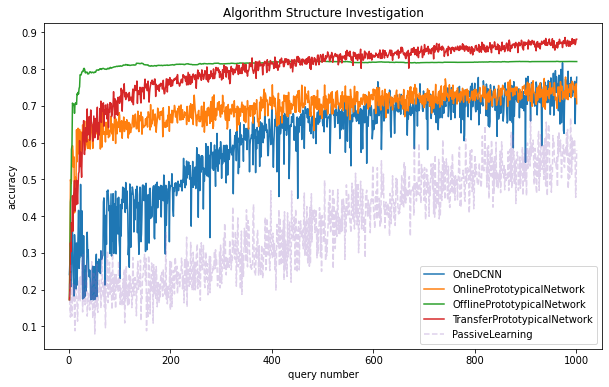

In [41]:
visual(paths_1)

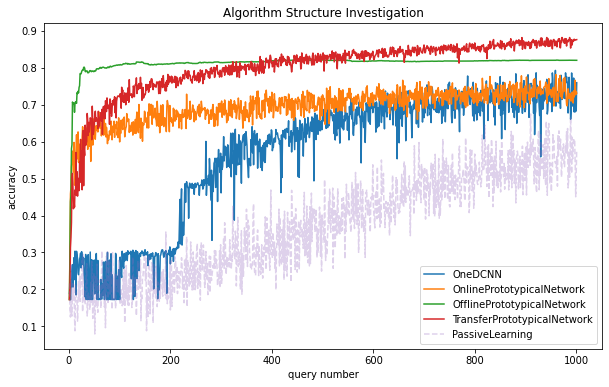

In [42]:
visual(paths_2)

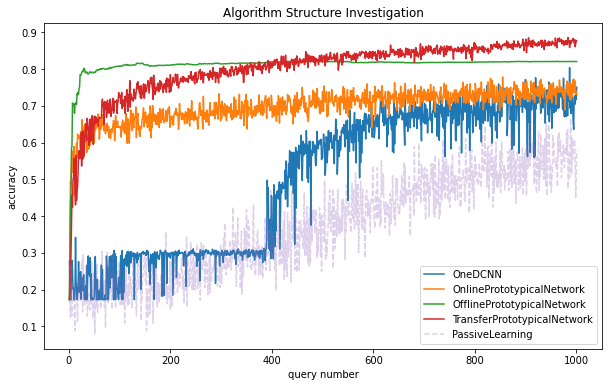

In [43]:
visual(paths_3)

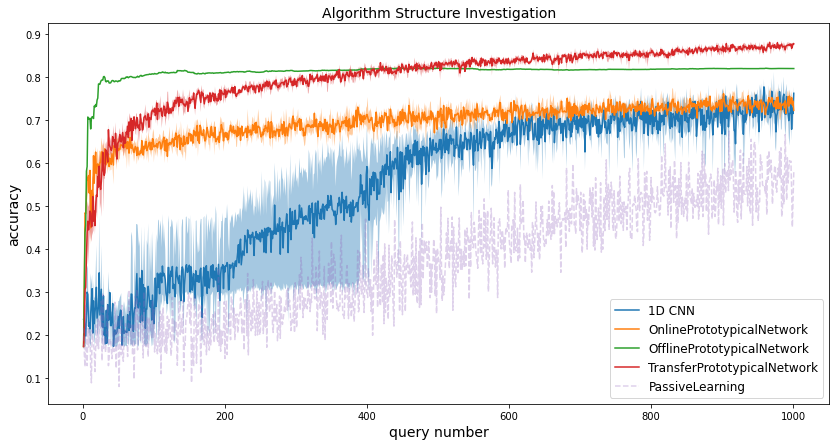

In [44]:
def bootstrap(values, confidence=0.95):
    return np.percentile(values,[100*(1-confidence)/2, 100*(1-(1-confidence)/2)])

passive_1, passive_2, passive_3 = load_result(paths_1[0]), load_result(paths_2[0]), load_result(paths_3[0])
oneDCNN_1, oneDCNN_2, oneDCNN_3 = load_result(paths_1[1]), load_result(paths_2[1]), load_result(paths_3[1])
onlinePN_1, onlinePN_2, onlinePN_3 = load_result(paths_1[2]), load_result(paths_2[2]), load_result(paths_3[2])
offlinePN_1, offlinePN_2, offlinePN_3 = load_result(paths_1[3]), load_result(paths_2[3]), load_result(paths_3[3])
transferPN_1, transferPN_2, transferPN_3 = load_result(paths_1[4]), load_result(paths_2[4]), load_result(paths_3[4])
passive_x = passive_1["plot_indeces"]
oneDCNN_x = oneDCNN_1["plot_indeces"]
onlinePN_x = onlinePN_1["plot_indeces"]
offlinePN_x = offlinePN_1["plot_indeces"]
transferPN_x = transferPN_1["plot_indeces"]
passive_acc = np.array([passive_1["accuracy"][0], passive_2["accuracy"][0], passive_3["accuracy"][0]])
oneDCNN_acc = np.array([oneDCNN_1["accuracy"][0], oneDCNN_2["accuracy"][0], oneDCNN_3["accuracy"][0]])
onlinePN_acc = np.array([onlinePN_1["accuracy"][0], onlinePN_2["accuracy"][0], onlinePN_3["accuracy"][0]])
offlinePN_acc = np.array([offlinePN_1["accuracy"][0], offlinePN_2["accuracy"][0], offlinePN_3["accuracy"][0]])
transferPN_acc = np.array([transferPN_1["accuracy"][0], transferPN_2["accuracy"][0], transferPN_3["accuracy"][0]])
passive_y = np.apply_along_axis(np.mean, 0, passive_acc)
oneDCNN_y = np.apply_along_axis(np.mean, 0, oneDCNN_acc)
onlinePN_y = np.apply_along_axis(np.mean, 0, onlinePN_acc)
offlinePN_y = np.apply_along_axis(np.mean, 0, offlinePN_acc)
transferPN_y = np.apply_along_axis(np.mean, 0, transferPN_acc)
passive_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(passive_acc))
oneDCNN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(oneDCNN_acc))
onlinePN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(onlinePN_acc))
offlinePN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(offlinePN_acc))
transferPN_y_conf_int = np.apply_along_axis(bootstrap,0,np.array(transferPN_acc))
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_x, oneDCNN_y, label="1D CNN")
ax.fill_between(oneDCNN_x, oneDCNN_y_conf_int[0], oneDCNN_y_conf_int[1], alpha=0.4)
ax.plot(onlinePN_x, onlinePN_y, label="OnlinePrototypicalNetwork")
ax.fill_between(onlinePN_x, onlinePN_y_conf_int[0], onlinePN_y_conf_int[1], alpha=0.4)
ax.plot(offlinePN_x, offlinePN_y, label="OfflinePrototypicalNetwork")
ax.fill_between(offlinePN_x, offlinePN_y_conf_int[0], offlinePN_y_conf_int[1], alpha=0.4)
ax.plot(transferPN_x, transferPN_y, label="TransferPrototypicalNetwork")
ax.fill_between(transferPN_x, transferPN_y_conf_int[0], transferPN_y_conf_int[1], alpha=0.4)
ax.plot(passive_x, passive_y, linestyle="--", alpha=0.3, label = "PassiveLearning")
ax.fill_between(passive_x, passive_y_conf_int[0], passive_y_conf_int[1], alpha=0.4)
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Algorithm Structure Investigation", fontsize=14)
ax.legend(fontsize=12)

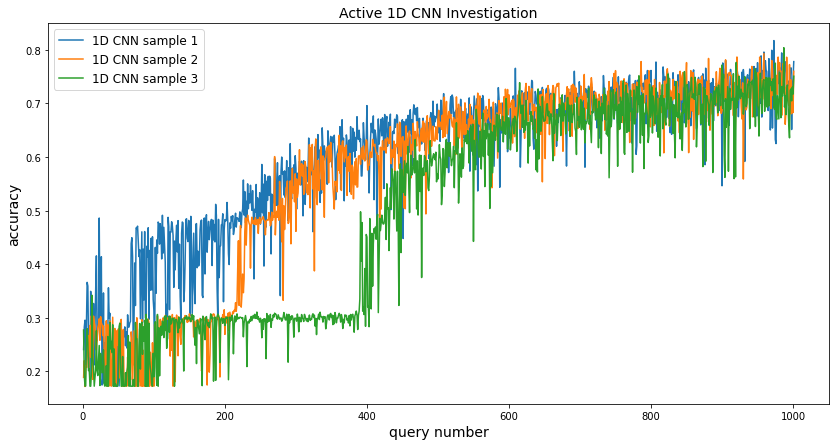

In [45]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_1["plot_indeces"], oneDCNN_1["accuracy"][0], label="1D CNN sample 1")
ax.plot(oneDCNN_2["plot_indeces"], oneDCNN_2["accuracy"][0], label="1D CNN sample 2")
ax.plot(oneDCNN_3["plot_indeces"], oneDCNN_3["accuracy"][0], label="1D CNN sample 3")
ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Active 1D CNN Investigation", fontsize=14)
ax.legend(fontsize=12)

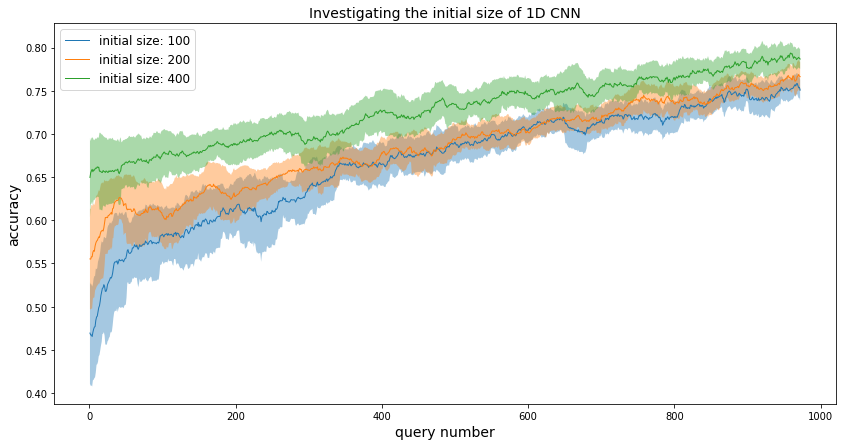

In [119]:
def calc_smooth(data, window):
    mean_x = pd.DataFrame(data["accuracy"][0]).rolling(window=window).mean()
    std_x = pd.DataFrame(data["accuracy"][0]).rolling(window=window).std()
    mean_x = np.array(mean_x[window-1:]).reshape(-1)
    std_x = np.array(std_x[window-1:]).reshape(-1)
    up_x = np.array(mean_x) + np.multiply(std_x, np.linspace(1,.4,len(std_x)))
    down_x = np.array(mean_x) - np.multiply(std_x, np.linspace(1,.4,len(std_x)))
    return mean_x, up_x, down_x
init_100 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__100.pkl")
init_200 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__200.pkl")
init_400 = load_result("exp_results/initial_exp/OneDCNN__uncertainty_sampling__400.pkl")
mean_x_100, up_x_100, down_x_100 = calc_smooth(init_100, 30)
mean_x_200, up_x_200, down_x_200 = calc_smooth(init_200, 30)
mean_x_400, up_x_400, down_x_400 = calc_smooth(init_400, 30)
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(oneDCNN_1["plot_indeces"][:-29], mean_x_100, label="initial size: 100", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][:-29], up_x_100, down_x_100, alpha=0.4)
ax.plot(oneDCNN_1["plot_indeces"][:-29], mean_x_200, label="initial size: 200", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][:-29], up_x_200, down_x_200, alpha=0.4)
ax.plot(oneDCNN_1["plot_indeces"][:-29], mean_x_400, label="initial size: 400", linewidth=1)
ax.fill_between(oneDCNN_1["plot_indeces"][:-29], up_x_400, down_x_400, alpha=0.4)

ax.set_xlabel("query number", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Investigating the initial size of 1D CNN", fontsize=14)
ax.legend(fontsize=12)

In [102]:
np.multiply(np.array(down_x_100).reshape(-1), np.linspace(1,0.8,len(down_x_100))).shape

(972,)

In [110]:
np.linspace(1,.8,10)

array([1.        , 0.97777778, 0.95555556, 0.93333333, 0.91111111,
       0.88888889, 0.86666667, 0.84444444, 0.82222222, 0.8       ])